In [1]:
#importing libs
import os
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [4]:
#load csv file with 2 colums id and label
csv_path = "/Users/thihahtun/Algo/Faces_rec/Dataset.csv"
df = pd.read_csv(csv_path)
df.head()

,id,label
0,Robert Downey Jr_87.jpg,Robert Downey Jr
1,Lisa Kudrow_64.jpg,Lisa Kudrow
2,Ellen Degeneres_34.jpg,Ellen Degeneres
3,Billie Eilish_3.jpg,Billie Eilish
4,Hrithik Roshan_35.jpg,Hrithik Roshan


In [8]:
import numpy as np

In [9]:
#loading images
X = []
y  = []
face_folder = "/Users/thihahtun/Algo/Faces_rec/faces/faces"
IMG_SIZE = (128,128)

for idx, row in df.iterrows():
    image_path = os.path.join(face_folder,row['id'])
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        img = cv2.resize(img, IMG_SIZE)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = img/255.0
        X.append(img)
        y.append(row['label'])

X = np.array(X, dtype =np.float32)
X = X.reshape(-1,128,128,1)
y = np.array(y)

In [14]:
X.shape

(2562, 128, 128, 1)

In [15]:
y.shape

(2562,)

In [16]:
y

array(['Robert Downey Jr', 'Lisa Kudrow', 'Ellen Degeneres', ...,
       'Elizabeth Olsen', 'Henry Cavill', 'Claire Holt'], dtype='<U18')

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts names to integers

In [18]:
y_encoded

array([25, 20, 14, ..., 13, 15, 10])

In [25]:
num_classes = len(label_encoder.classes_)

In [26]:
#building model with 2 conv layers
model = keras.Sequential([
    layers.Conv2D(32,3,activation ='relu',input_shape=(128,128,1)),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,activation ='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation = 'softmax')
])

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# split train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.3,random_state=42)

In [28]:
model.compile(
    optimizer ="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [30]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.0641 - loss: 3.4767
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.3199 - loss: 2.4922
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.4986 - loss: 1.7075
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.5740 - loss: 1.4537
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.7725 - loss: 0.7992
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.8696 - loss: 0.4950
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.8586 - loss: 0.5246
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.9717 - loss: 0.1441
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.9902 - loss: 0.0761
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.9989 - loss: 0.0258


In [31]:
model.evaluate(X_test,y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6114 - loss: 2.1691


[2.013317108154297, 0.631989598274231]

In [37]:
y_pred = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [38]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [40]:
predicted_labels = label_encoder.inverse_transform(y_pred_classes)

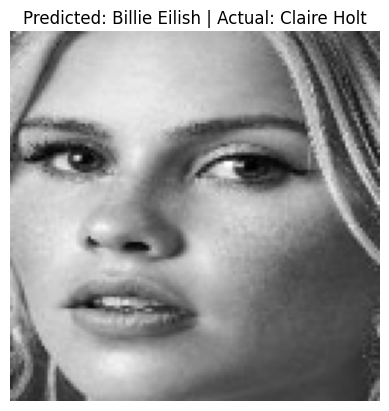

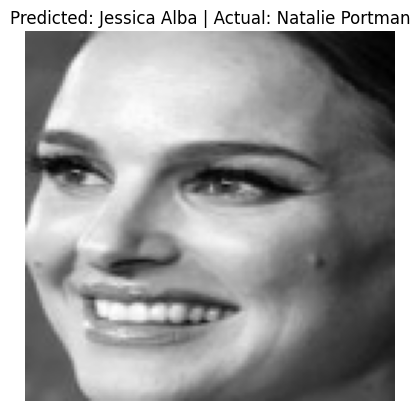

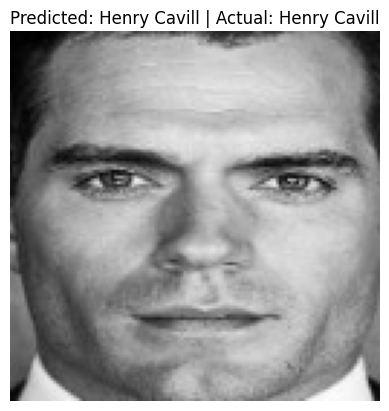

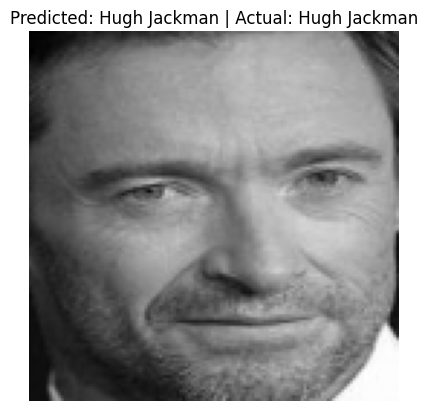

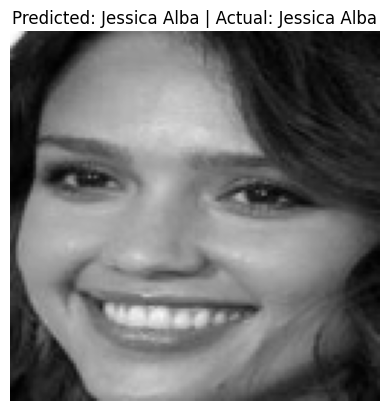

In [42]:
for i in range(5):
    plt.imshow(X_test[i].reshape(128, 128), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]} | Actual: {label_encoder.inverse_transform([y_test[i]])[0]}")
    plt.axis('off')
    plt.show()


In [59]:
#predicting my own images
img_path = '/Users/thihahtun/Algo/Akshay Kumar_25.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, IMG_SIZE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img / 255.0
img = img.reshape(1, 128, 128, 1)  # reshape for prediction

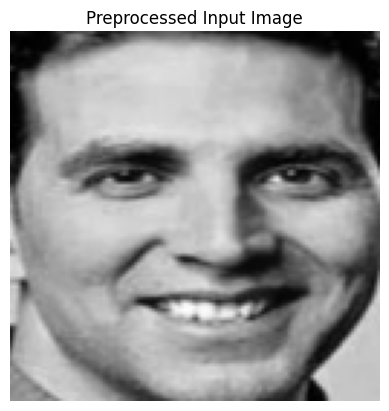

In [60]:
import matplotlib.pyplot as plt

plt.imshow(img.reshape(128, 128), cmap='gray')
plt.title("Preprocessed Input Image")
plt.axis('off')  # Hides the axis
plt.show()

In [61]:
pred = model.predict(img)
predicted_label = label_encoder.inverse_transform([np.argmax(pred)])[0]
print("Predicted Label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Label: Akshay Kumar
